In [6]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

# Load motiondeblur module and Dataset class
import libwallerlab.projects.motiondeblur as md
from libwallerlab.utilities.io import Dataset, isDataset
from matplotlib_scalebar.scalebar import ScaleBar

# Platform imports
import os, glob
from os.path import expanduser
import numpy as np

# Debugging imports
import llops as yp
import matplotlib.pyplot as plt

yp.config.setDefaultBackend('arrayfire')
yp.config.setDefaultDatatype('float32')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
q = np.load('/Users/zfphil/datasets/strobe_stitched.npz')
y0 = q['x']

y_shape = [sh // 2 * 2 for sh in yp.shape(y0)]
y = yp.cast(y0[:y_shape[0], :y_shape[1]])

Minimizing function:


<IPython.core.display.Latex object>

|  Iter  |      Cost      | Elapsed time (s) |  Norm of Step  | Memory Usage (CPU/GPU) |
+ ------ + -------------- + ---------------- + -------------- + ---------------------- +
|    0   |    6.34e+05    |       0.00       |    0.00e+00    | 1172.5 MB / 19003.0 MB  |
|   25   |    2.16e+04    |      10.08       |    4.60e+00    | 1172.6 MB / 19836.5 MB  |
|   50   |    2.09e+04    |      19.45       |    1.52e+00    | 1172.6 MB / 19836.5 MB  |
|   75   |    2.09e+04    |      28.89       |    1.89e-01    | 1126.7 MB / 19836.5 MB  |
Met convergence requirement (delta < 1.00E-14) at iteration 81


<IPython.core.display.Javascript object>


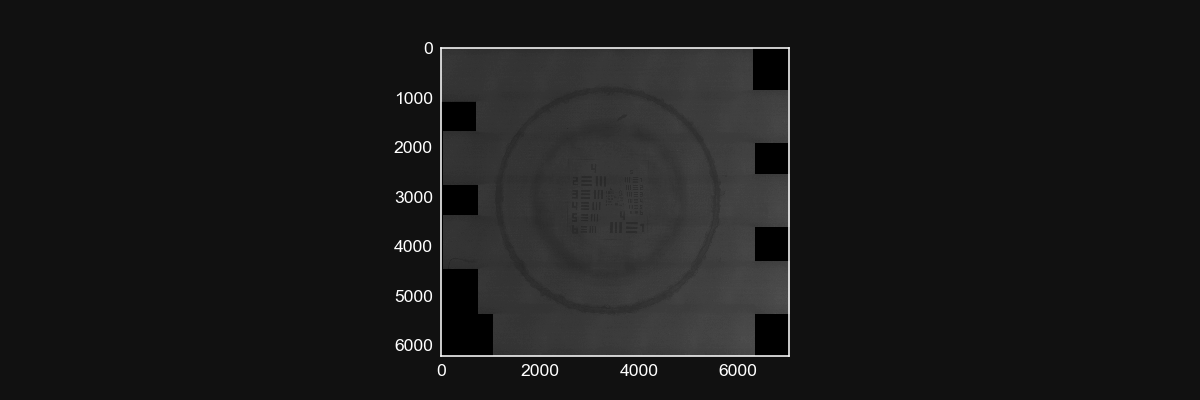

In [43]:
import ndoperators as ops

# Generate objective function
I = ops.Identity(yp.shape(y))
TV = ops.regularizers.TV(yp.shape(y))
objective = ops.objectivefunctions.L2(I, y) +1e-2 * TV

# Create solver and solve
solver =  ops.solvers.Fista(objective)
x_opt = solver.solve(iteration_count=250, step_size=0.1)

plt.figure()
plt.imshow(x_opt)

In [44]:
np.savez('/Users/zfphil/datasets/strobe_stitched_denoised.npz', x=q['x'], tv=yp.changeBackend(x_opt, 'numpy'))